# What is embeddings?
- In NLP, Embedding is a numerical representation of text. Simply, convert text into a series of numbers, called vector (1d). Allow to determine similar vectors
- Purpose: Capture semantic meaning include context and intent behind text.
## Main use cases
- Semantic search (in semantic search engine)
- Recommendation systems
- Text classification


In [1]:
from openai import OpenAI
import json
client = OpenAI()

In [12]:
response = client.embeddings.create(
    model="text-embedding-3-small",  
    input="Embeddings are a numerical representation of text that can be used tomeasure the relatedness between two pieces of text.")

response_dict = response.model_dump()
print(response_dict)
print(len(response_dict['data'][0]['embedding']))  # print the embedding vector
print(response_dict['data'][0]['embedding'][:5])  # print the first 5 elements of the embedding vector

{'data': [{'embedding': [-0.014812295325100422, -0.015753261744976044, 0.03592589497566223, -0.0029682740569114685, 0.009536538273096085, 0.007903062738478184, 0.06373199075460434, -0.02211800217628479, -0.012158557772636414, 0.0013757672859355807, -0.00513302581384778, -0.008627289906144142, 0.0019691577181220055, -0.03410739824175835, 0.04334790259599686, 0.0017048412701115012, 0.031231634318828583, -0.006888087373226881, 0.02575499750673771, 0.06483154743909836, 0.008188524283468723, -0.00745372474193573, 0.010414069518446922, 0.035228099673986435, 0.024317115545272827, 0.004955933894962072, 0.01545722782611847, 0.04210032895207405, 0.061998073011636734, -0.036306511610746384, -0.02055324986577034, -0.013585866428911686, 0.0226677805185318, -0.00799292977899313, -0.0012555032735690475, 0.03203515708446503, -0.03087216429412365, 0.03326158598065376, -0.01976029947400093, 0.02928626537322998, 0.008384118787944317, 0.0564580000936985, -0.06521216034889221, 0.007020245771855116, -0.0584

In [13]:
articles = [
    {"headline": "Economic Growth Continues Amid Global Uncertainty", "topic": "Business"},    
    {"headline": "Interest rates fall to historic lows", "topic": "Business"},    
    {"headline": "Scientists Make Breakthrough Discovery in Renewable Energy", "topic": "Science"},    
    {"headline": "India Successfully Lands Near Moon's South Pole", "topic": "Science"},    
    {"headline": "New Particle Discovered at CERN", "topic": "Science"},    
    {"headline": "Tech Company Launches Innovative Product to Improve Online Accessibility", "topic": "Tech"},    
    {"headline": "Tech Giant Buys 49% Stake In AI Startup", "topic": "Tech"},    
    {"headline": "New Social Media Platform Has Everyone Talking!", "topic": "Tech"},    
    {"headline": "The Blues get promoted on the final day of the season!", "topic": "Sport"},    
    {"headline": "1.5 Billion Tune-in to the World Cup Final", "topic": "Sport"}]


In [14]:
headline_text = [article['headline'] for article in articles]
headline_text

['Economic Growth Continues Amid Global Uncertainty',
 'Interest rates fall to historic lows',
 'Scientists Make Breakthrough Discovery in Renewable Energy',
 "India Successfully Lands Near Moon's South Pole",
 'New Particle Discovered at CERN',
 'Tech Company Launches Innovative Product to Improve Online Accessibility',
 'Tech Giant Buys 49% Stake In AI Startup',
 'New Social Media Platform Has Everyone Talking!',
 'The Blues get promoted on the final day of the season!',
 '1.5 Billion Tune-in to the World Cup Final']

In [ ]:
response = client.embeddings.create(
    model="text-embedding-3-small",  
    input=headline_text
)

response_dict = response.model_dump()
print(json.dumps(response_dict, indent=2))  # pretty print the response


In [18]:
for i, article in enumerate(articles):
    article['embedding'] = response_dict['data'][i]['embedding']
    
print(json.dumps(articles, indent=2))  # pretty print the articles with embeddings

[
  {
    "headline": "Economic Growth Continues Amid Global Uncertainty",
    "topic": "Business",
    "embedding": [
      0.00631048996001482,
      0.008328129537403584,
      0.05450693145394325,
      0.04758930951356888,
      0.02627224288880825,
      0.0359618179500103,
      -0.0007340006995946169,
      0.09419739991426468,
      0.017760135233402252,
      -0.03250300884246826,
      0.019452743232250214,
      -0.0012594915460795164,
      -0.07589758932590485,
      -0.03495606407523155,
      0.03417108580470085,
      0.053133219480514526,
      -0.0494045726954937,
      -0.009205097332596779,
      -0.0205566193908453,
      0.018140358850359917,
      0.024567367509007454,
      -0.01955086551606655,
      -0.023966370150446892,
      0.0029329366516321898,
      -0.006948284804821014,
      0.004286717623472214,
      -0.05185763165354729,
      0.0063656833954155445,
      3.854462192975916e-05,
      -0.01585901528596878,
      0.04138307645916939,
      -0.01587

## Dimensionality reduction and t-SNE
- Use t-sne to reduce the number of dimensions in the embedding vectors
- Use matplotlib to show similiar topics

In [ ]:

from sklearn.manifold import TSNE
import numpy as np

embeddings = [article['embedding'] for article in articles]
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))



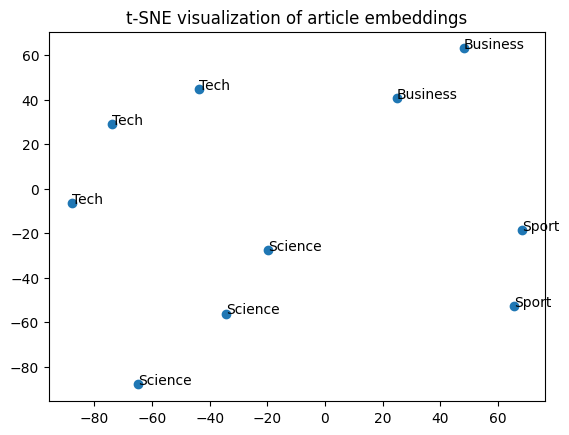

In [21]:
# Visualizing the embeddings
import matplotlib.pyplot as plt

plt.clf()
plt.title("t-SNE visualization of article embeddings")
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

topics = [article['topic'] for article in articles]
for i, topic in enumerate(topics):    
    plt.annotate(topic, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()


## Understand text similarity
- Use the `cosine` distance to find similar embedding vectors, then determine similar text
    - Ranges from 0 to 2
    - Smaller numbers = Greater similarity
- 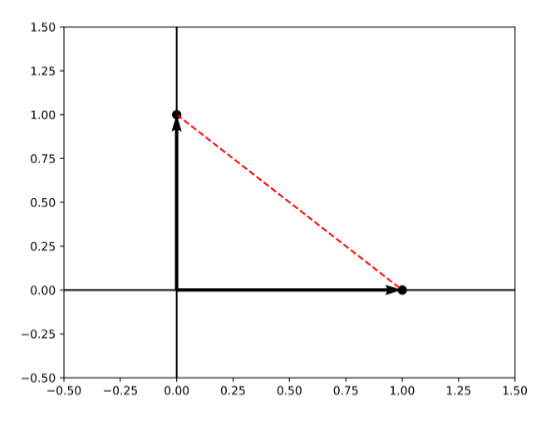
- There are several method to measure the distance of vectors in vector space like `cosine`, `euclidean`. Vector databases support them. You only need to choose to use them
- 

In [22]:
from scipy.spatial import distance
distance = distance.cosine([0, 1], [1, 0])
print(f"Cosine distance: {distance}")

Cosine distance: 1.0


### Example: Comparing headline similarity

In [23]:
def create_embeddings(texts):  
    response = client.embeddings.create(
        model="text-embedding-3-small",
        input=texts)  
    
    response_dict = response.model_dump()
    return [data['embedding'] for data in response_dict['data']]



In [24]:
print(create_embeddings(["Python is the best!", "R is the best!"]))
print(create_embeddings("DataCamp is awesome!")[0])

[[-0.03197936713695526, -0.013423292897641659, -0.030844006687402725, 0.024552207440137863, 0.005206699948757887, -0.035148922353982925, 0.006457372568547726, 0.04044727981090546, -0.021761108189821243, 0.005709334276616573, 0.015138162299990654, -0.0513751395046711, -0.007001399993896484, -0.009638751856982708, 0.04245781525969505, 0.016498232260346413, -0.01214601006358862, 0.011412755586206913, -0.045721981674432755, 0.018319541588425636, 0.031175153329968452, 0.005795077886432409, -0.03394259884953499, -5.640776362270117e-05, 0.04425547271966934, -0.02452855370938778, -0.031884755939245224, 0.037419646978378296, -0.02161918766796589, 0.0003329952305648476, 0.006717559415847063, -0.016853032633662224, -0.03309107571840286, -0.010383833199739456, -0.037940021604299545, -0.030962273478507996, -0.0025456948205828667, -0.011034301482141018, 0.02046017348766327, -0.015256429091095924, 0.019632304087281227, -0.05795077979564667, 0.0022248958703130484, -0.00046308879973366857, 0.0016513015

In [25]:
from scipy.spatial import distance
import numpy as np

search_text = "computer"
search_embedding = create_embeddings(search_text)[0]

distances = []
for article in articles:  
    dist = distance.cosine(search_embedding, article["embedding"])  
    distances.append(dist)
    min_dist_ind = np.argmin(distances) # find the index of the minimum distance

print(articles[min_dist_ind]['headline'])

Tech Giant Buys 49% Stake In AI Startup


# Embeddings for AI applications
## Semantic search engine
- Often implemented in vector database


In [26]:
articles = [    
    {"headline": "Economic Growth Continues Amid Global Uncertainty","topic": "Business","keywords": ["economy", "business", "finance"]},    
    {"headline": "1.5 Billion Tune-in to the World Cup Final","topic": "Sport","keywords": ["soccer", "world cup", "tv"]}
]


In [29]:
def create_article_text(article):
    return f"""
        Headline: {article['headline']}
        Topic: {article['topic']}
        Keywords: {', '.join(article['keywords'])}
    """
    
print(create_article_text(articles[-1]))


        Headline: 1.5 Billion Tune-in to the World Cup Final
        Topic: Sport
        Keywords: soccer, world cup, tv
    


In [31]:
article_texts = [ create_article_text(article) for article in articles ]
article_embeddings = create_embeddings(article_texts)

print(article_embeddings)

[[0.03504710644483566, 0.020416704937815666, 0.04179779067635536, 0.03492949903011322, 0.017723487690091133, 0.014759771525859833, -0.015959370881319046, 0.07385766506195068, 0.03770504146814346, -0.027379082515835762, 0.017594117671251297, -0.02754373289644718, -0.09822598844766617, -0.04036297649145126, 0.02770838513970375, 0.08204316347837448, -0.06167349964380264, 0.00845599640160799, -0.0013054459122940898, 0.041115667670965195, 0.004827797878533602, -0.0007622452103532851, -0.008832341991364956, 0.026108918711543083, 0.015959370881319046, 0.00577748054638505, -0.04678435996174812, 0.02488579787313938, 0.033588770776987076, -0.020134445279836655, 0.06510765105485916, -0.013807149603962898, 0.03304777666926384, 0.03817547485232353, -0.027825992554426193, 0.009173404425382614, 0.014595121145248413, -0.024180151522159576, 0.04934820905327797, -0.033424120396375656, -0.0053570326417684555, -0.023615635931491852, 0.01464216411113739, 0.039375074207782745, -0.023156965151429176, -0.0096

In [32]:
# Compute distance
from scipy.spatial import distance
def find_n_closest(query_vector, embeddings, n=3):  
    distances = []
    for index, embedding in enumerate(embeddings):    
        dist = distance.cosine(query_vector, embedding)    
        distances.append({"distance": dist, "index": index})  
    
    distances_sorted = sorted(distances, key=lambda x: x["distance"])    
    return distances_sorted[0:n]


In [36]:
query_text = "economic development"
query_vector = create_embeddings(query_text)[0]
hits = find_n_closest(query_vector, article_embeddings, n=1)

for hit in hits:  
    article = articles[hit['index']]
    print(article['headline'])

Economic Growth Continues Amid Global Uncertainty


## Recommendation system
Process:

1. Embed the potential recommendations and data point
2. Calculate cosine distances
3. Recommend closest items
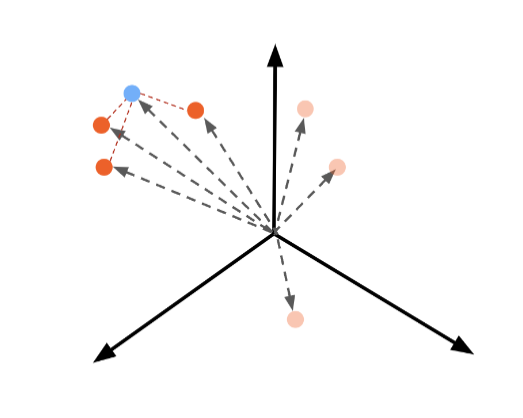



In [37]:
articles = [
    {"headline": "Economic Growth Continues Amid Global Uncertainty","topic": "Business","keywords": ["economy", "business", "finance"]},    
    {"headline": "1.5 Billion Tune-in to the World Cup Final","topic": "Sport","keywords": ["soccer", "world cup", "tv"]}
]

current_article = {"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race","topic": "Tech","keywords": ["ai", "business", "computers"]}


In [38]:
article_texts = [create_article_text(article) for article in articles]
current_article_text = create_article_text(current_article)
print(current_article_text)

current_article_embeddings = create_embeddings(current_article_text)[0]
article_embeddings = create_embeddings(article_texts)


        Headline: How NVIDIA GPUs Could Decide Who Wins the AI Race
        Topic: Tech
        Keywords: ai, business, computers
    


In [40]:
hits = find_n_closest(current_article_embeddings, article_embeddings)
for hit in hits:  
    article = articles[hit['index']]
    
print(article['headline'])


1.5 Billion Tune-in to the World Cup Final


## Recommendations on multiple data points
Process:

1. Combine multiple vectors into one by taking the mean
2. Compute cosine distances
3. Recommend closest vector
4. Ensure that it's unread

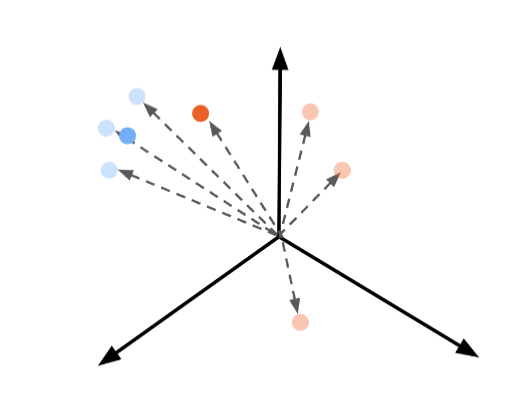

In [41]:
user_history = [ 
    {"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race","topic": "Tech","keywords": ["ai", "business", "computers"]},
    {"headline": "Tech Giant Buys 49% Stake In AI Startup","topic": "Tech","keywords": ["business", "AI"]}
]


In [42]:
history_texts = [create_article_text(article) for article in user_history]
history_embeddings = create_embeddings(history_texts)
mean_history_embeddings = np.mean(history_embeddings, axis=0)

articles_filtered = [article for article in articles if article not in user_history]

article_texts = [create_article_text(article) for article in articles_filtered]

article_embeddings = create_embeddings(article_texts)

In [43]:
hits = find_n_closest(mean_history_embeddings, article_embeddings)
for hit in hits:  
    article = articles_filtered[hit['index']]
    print(article['headline'])

Economic Growth Continues Amid Global Uncertainty
1.5 Billion Tune-in to the World Cup Final


## Embeddings forclassification tasks